# Notebook to visualize "parents" field in the school dataset, create multiple single caregiver fields to separate and make atomic values for existing multivalue entries in the "parents" field and visualizing the distributions before and after creating separate fields.

1. Importing csv for working with csv file
2. Importing pandas and numpy for data manipulation
3. Importing matplotlib.pyplot, seaborn for plotting the data.

In [245]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Opening the csvfile to do initial "parents" field visualisation using csv package
2. Reading data by creating iterator
3. Creating headers from the first row of data

In [246]:
csvfile = open('../school-yrbs/Somerville_High_School_YRBS_Raw_Data_2002-2016.csv', 'r')
sreader = csv.reader(csvfile)
headers = next(sreader, None)
headers

['survey',
 'id',
 'age',
 'gender',
 'grade',
 'race',
 'language',
 'live_us',
 'parents',
 'home',
 'skl_gra',
 'fut_ed',
 'DOCT_12',
 'DENT_12',
 'witness',
 'emo_abus',
 'mistreat',
 'harassed',
 'hurtdate',
 'gang',
 'bull_skl',
 'nothing',
 'trystop',
 'teltea',
 'telpar',
 'telfri',
 'saw_bul',
 'tookpart',
 'justsaw',
 'intervene',
 'SUPPORT',
 'toldtea',
 'bull_out',
 'bull_elec',
 'fit_skl',
 'fit_out',
 'weap_skl',
 'weap_out',
 'stayhome',
 'POL_INTERACT',
 'POL_SAFETY',
 'POL_COMFORT',
 'divorce',
 'moved',
 'death',
 'ran_away',
 'friends',
 'adu_skl',
 'adu_oth',
 'skl_wor',
 'soc_wor',
 'appe_wor',
 'fam_wor',
 'gang_wor',
 'bul_wor',
 'ANXIETY_30',
 'hurtself',
 'depress',
 'consider',
 'plan',
 'attempt',
 'SUICIDE_TALK',
 'COUNSELOR',
 'THERAPIST',
 'MEDS',
 'cig_lif',
 'cig_age',
 'cig_30',
 'cig_day',
 'ECIGS_USE',
 'cigar_30',
 'chew_30',
 'alc_age',
 'alc_30',
 'ALC3_30',
 'alc5_30',
 'alc_get',
 'dwi_ride',
 'dwi_driv',
 'pot_age',
 'pot_30',
 'cok_age',
 'cok_

1. Defining an empty dictionary to hold various fields
2. Initializing an empty list for each header in the dataset

In [247]:
column = {}
for h in headers:
    column[h] = []
column

{'ALC3_30': [],
 'ANXIETY_30': [],
 'CAFFEINE': [],
 'COUNSELOR': [],
 'DENT_12': [],
 'DOCT_12': [],
 'ECIGS_USE': [],
 'ENERGY': [],
 'EXP_RX': [],
 'FORCED_TALK': [],
 'HUNGRY': [],
 'MEDS': [],
 'MENTAL_DOC': [],
 'MENTAL_NOT': [],
 'PAIN_DOC': [],
 'PAIN_NOT': [],
 'PA_RX': [],
 'POL_COMFORT': [],
 'POL_INTERACT': [],
 'POL_SAFETY': [],
 'RSK_RX': [],
 'RX_USE': [],
 'SCHOOL': [],
 'STIM_DOC': [],
 'STIM_NOT': [],
 'SUICIDE_TALK': [],
 'SUPPORT': [],
 'SURLANG': [],
 'THERAPIST': [],
 'adu_oth': [],
 'adu_skl': [],
 'aft_cntr': [],
 'aft_fiel': [],
 'aft_park': [],
 'aft_path': [],
 'aft_play': [],
 'aft_prog': [],
 'aft_yard': [],
 'age': [],
 'alc5_30': [],
 'alc_30': [],
 'alc_age': [],
 'alc_get': [],
 'appe_wor': [],
 'attempt': [],
 'beforskl': [],
 'brkfst_7': [],
 'bul_wor': [],
 'bull_elec': [],
 'bull_out': [],
 'bull_skl': [],
 'chew_30': [],
 'chew_age': [],
 'children': [],
 'cig_30': [],
 'cig_age': [],
 'cig_day': [],
 'cig_get': [],
 'cig_lif': [],
 'cigar_30': [],

1. Adding all records of a field to that column dictionary
2. Printing "parents" field

In [248]:
for row in sreader:
    for h, v in zip(headers, row):
        column[h].append(v)
column['parents']

['My mother and my father',
 'My mother and a step-parent',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother only',
 'My mother only',
 'My mother and my father',
 'My mother and my father',
 'My mother and a step-parent',
 'My mother only',
 'My father only',
 'My mother and a step-parent',
 'My mother only',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother only',
 'My mother and my father',
 'My mother and my father',
 'My mother only',
 'My mother and a step-parent',
 'My mother only',
 'My father only',
 'My mother only',
 'My mother and my father',
 'Someone else not on this list',
 'My mother and my father',
 'My mother only',
 'My mother only',
 'My mother and my father',
 'My father and a step-parent',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother only',

Removing empty entries in parents field to prepare for visualising the parents field in the dataset before changing that field into atomic valued multiple single caregiver fields

In [249]:
while ' ' in column['parents']:
    column['parents'].remove(' ')

Printing 'parents' field after empty string removal

In [250]:
column['parents']

['My mother and my father',
 'My mother and a step-parent',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother only',
 'My mother only',
 'My mother and my father',
 'My mother and my father',
 'My mother and a step-parent',
 'My mother only',
 'My father only',
 'My mother and a step-parent',
 'My mother only',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother only',
 'My mother and my father',
 'My mother and my father',
 'My mother only',
 'My mother and a step-parent',
 'My mother only',
 'My father only',
 'My mother only',
 'My mother and my father',
 'Someone else not on this list',
 'My mother and my father',
 'My mother only',
 'My mother only',
 'My mother and my father',
 'My father and a step-parent',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother only',

Finding out the total number of entries in the "parents" field after mepty string removal

In [251]:
print(len(column['parents']))

4954


Using counter class of collections package to find out the frequency of various entries in the "parents" field

In [252]:
from collections import Counter
cnt = Counter()
for word in column['parents']:
    cnt[word] += 1
cnt

Counter({'Another relative (like a grandparent, aunt/uncle)': 226,
         'Foster parent(s)': 16,
         'My father and a step-parent': 76,
         'My father only': 152,
         'My mother and a step-parent': 389,
         'My mother and my father': 2873,
         'My mother only': 1130,
         'Someone else not on this list': 92})

Plotting a bar chart of the "parents" field before making equivalent multiple fields with atomic values using pandas package

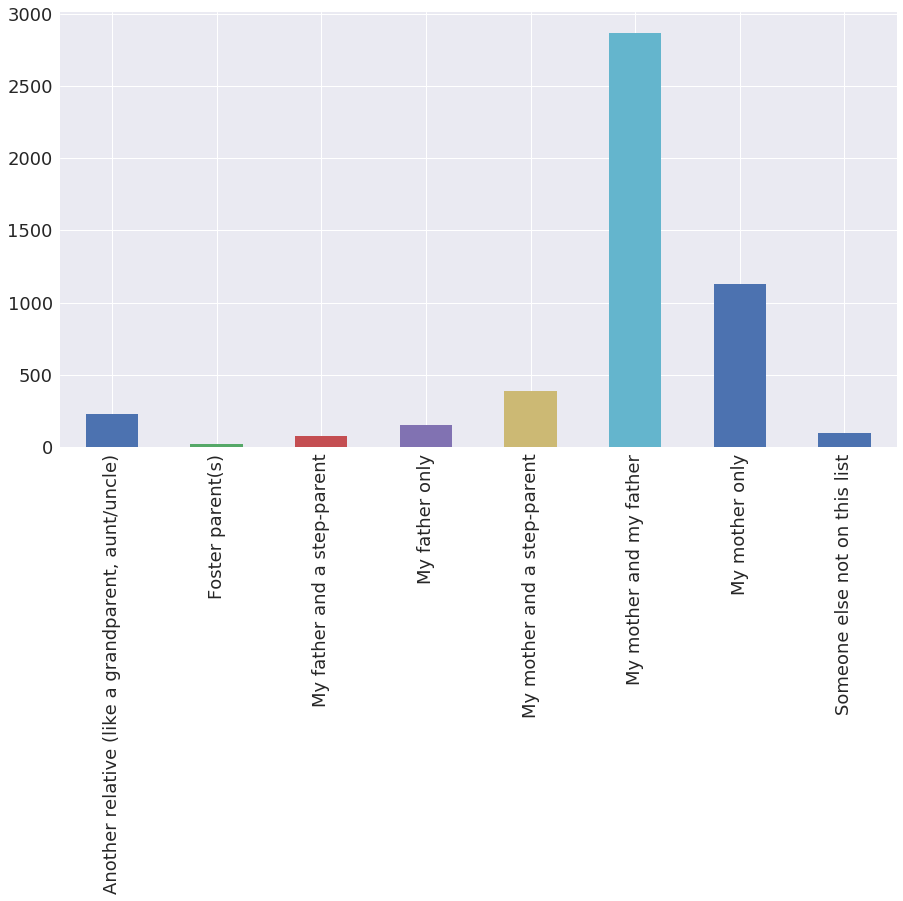

In [253]:
pd.Series(cnt).plot(kind='bar', figsize=(15,8), fontsize= 18)

Plotting a pie chart of the "parents" field before making equivalent multiple fields with atomic values using pandas package

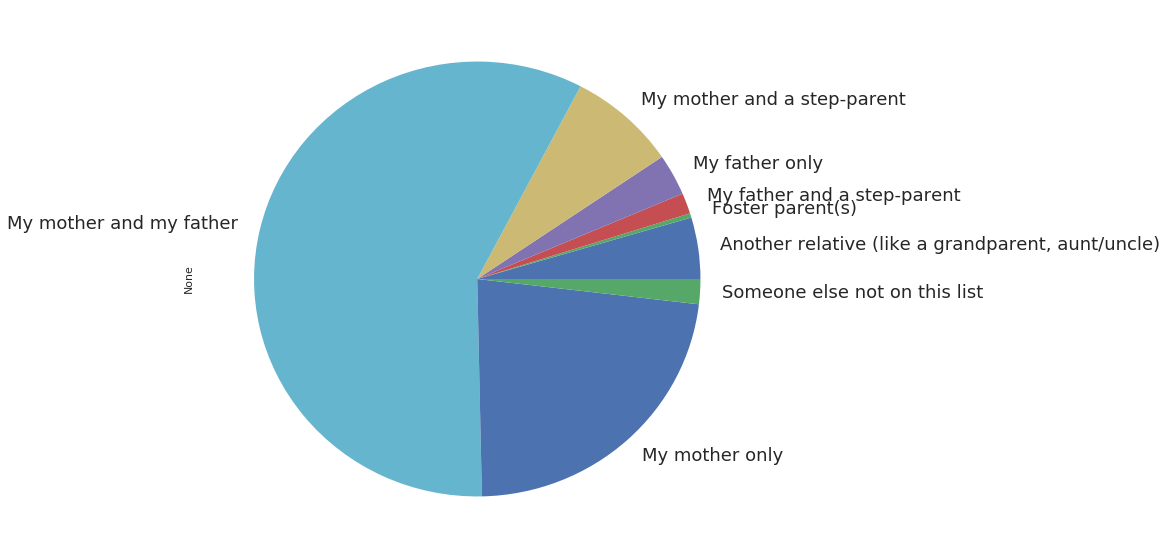

In [254]:
pd.Series(cnt).plot(kind='pie', figsize=(10,10), fontsize= 18)

Closing the csv file after initial visualization

In [255]:
csvfile.close()

1. Opening the csvfile to separate multi-valued entries in "parents" field and make atomic values of the "parents" field
2. Reading data by creating iterator
3. Creating headers from the first row of data

In [256]:
csvf = open('../school-yrbs/Somerville_High_School_YRBS_Raw_Data_2002-2016.csv', 'r')
sreader = csv.reader(csvf)
headers = next(sreader, None)
headers

['survey',
 'id',
 'age',
 'gender',
 'grade',
 'race',
 'language',
 'live_us',
 'parents',
 'home',
 'skl_gra',
 'fut_ed',
 'DOCT_12',
 'DENT_12',
 'witness',
 'emo_abus',
 'mistreat',
 'harassed',
 'hurtdate',
 'gang',
 'bull_skl',
 'nothing',
 'trystop',
 'teltea',
 'telpar',
 'telfri',
 'saw_bul',
 'tookpart',
 'justsaw',
 'intervene',
 'SUPPORT',
 'toldtea',
 'bull_out',
 'bull_elec',
 'fit_skl',
 'fit_out',
 'weap_skl',
 'weap_out',
 'stayhome',
 'POL_INTERACT',
 'POL_SAFETY',
 'POL_COMFORT',
 'divorce',
 'moved',
 'death',
 'ran_away',
 'friends',
 'adu_skl',
 'adu_oth',
 'skl_wor',
 'soc_wor',
 'appe_wor',
 'fam_wor',
 'gang_wor',
 'bul_wor',
 'ANXIETY_30',
 'hurtself',
 'depress',
 'consider',
 'plan',
 'attempt',
 'SUICIDE_TALK',
 'COUNSELOR',
 'THERAPIST',
 'MEDS',
 'cig_lif',
 'cig_age',
 'cig_30',
 'cig_day',
 'ECIGS_USE',
 'cigar_30',
 'chew_30',
 'alc_age',
 'alc_30',
 'ALC3_30',
 'alc5_30',
 'alc_get',
 'dwi_ride',
 'dwi_driv',
 'pot_age',
 'pot_30',
 'cok_age',
 'cok_

1. Defining an empty dictionary to hold various fields
2. Initializing an empty list for each header in the dataset
3. Adding some more headers to make fields for single caregivers data based on "parents" field

In [257]:
column = {}
for h in headers:
    column[h] = []
column['mother'] = []
column['father'] = []
column['step-parent'] = []
column['Another relative (like a grandparent, aunt/uncle)'] = []
column['Foster parent(s)'] = []
column['Someone else not on this list'] = []
column

{'ALC3_30': [],
 'ANXIETY_30': [],
 'Another relative (like a grandparent, aunt/uncle)': [],
 'CAFFEINE': [],
 'COUNSELOR': [],
 'DENT_12': [],
 'DOCT_12': [],
 'ECIGS_USE': [],
 'ENERGY': [],
 'EXP_RX': [],
 'FORCED_TALK': [],
 'Foster parent(s)': [],
 'HUNGRY': [],
 'MEDS': [],
 'MENTAL_DOC': [],
 'MENTAL_NOT': [],
 'PAIN_DOC': [],
 'PAIN_NOT': [],
 'PA_RX': [],
 'POL_COMFORT': [],
 'POL_INTERACT': [],
 'POL_SAFETY': [],
 'RSK_RX': [],
 'RX_USE': [],
 'SCHOOL': [],
 'STIM_DOC': [],
 'STIM_NOT': [],
 'SUICIDE_TALK': [],
 'SUPPORT': [],
 'SURLANG': [],
 'Someone else not on this list': [],
 'THERAPIST': [],
 'adu_oth': [],
 'adu_skl': [],
 'aft_cntr': [],
 'aft_fiel': [],
 'aft_park': [],
 'aft_path': [],
 'aft_play': [],
 'aft_prog': [],
 'aft_yard': [],
 'age': [],
 'alc5_30': [],
 'alc_30': [],
 'alc_age': [],
 'alc_get': [],
 'appe_wor': [],
 'attempt': [],
 'beforskl': [],
 'brkfst_7': [],
 'bul_wor': [],
 'bull_elec': [],
 'bull_out': [],
 'bull_skl': [],
 'chew_30': [],
 'chew_a

1. Adding all records of a field to that column dictionary
2. Printing "parents" field
(Not removing empty strings so that dataset record order is preserved to write back each of the single caregiver fields in a new csv file

In [258]:
for row in sreader:
    for h, v in zip(headers, row):
        column[h].append(v)
column['parents']

['My mother and my father',
 'My mother and a step-parent',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother only',
 'My mother only',
 'My mother and my father',
 'My mother and my father',
 'My mother and a step-parent',
 'My mother only',
 'My father only',
 'My mother and a step-parent',
 'My mother only',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother only',
 'My mother and my father',
 'My mother and my father',
 'My mother only',
 'My mother and a step-parent',
 'My mother only',
 'My father only',
 'My mother only',
 'My mother and my father',
 'Someone else not on this list',
 'My mother and my father',
 'My mother only',
 'My mother only',
 'My mother and my father',
 'My father and a step-parent',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother and my father',
 'My mother only',

1. Creating a list for each single caregiver type
2. Adding 1 to each list if the original dataset entry corresponds to this field (have just compared each entry with various possible values, we can also use other functions like contains, in, substr among others).
3. Adding 0 to each list otherwise
4. Assigning the single caregiver lists to respective column headers

In [259]:
m = list()
f = list()
s_p = list()
f = list()
another = list()
other = list()
for i in column['parents']:
    if i == "My mother and my father":
        m.append(1)
        f.append(1)
        s_p.append(0)
        f.append(0)
        another.append(0)
        other.append(0)
    elif i == "My mother and a step-parent":
        m.append(1)
        f.append(0)
        s_p.append(1)
        f.append(0)
        another.append(0)
        other.append(0)
    elif i == "My father and a step-parent":
        m.append(0)
        f.append(1)
        s_p.append(1)
        f.append(0)
        another.append(0)
        other.append(0)
    elif i == "My mother only":
        m.append(1)
        f.append(0)
        s_p.append(0)
        f.append(0)
        another.append(0)
        other.append(0)
    elif i == "My father only":
        m.append(0)
        f.append(1)
        s_p.append(0)
        f.append(0)
        another.append(0)
        other.append(0)
    elif i == "Another relative (like a grandparent, aunt/uncle)":
        m.append(0)
        f.append(0)
        s_p.append(0)
        f.append(0)
        another.append(1)
        other.append(0)
    elif i == "Foster parent(s)":
        m.append(0)
        f.append(0)
        s_p.append(0)
        f.append(1)
        another.append(0)
        other.append(0)
    elif i == "Someone else not on this list":
        m.append(0)
        f.append(0)
        s_p.append(0)
        f.append(1)
        another.append(0)
        other.append(1)
    else:
        continue
column['mother'] = m
column['father'] = f
column['step-parent'] = s_p
column['Another relative (like a grandparent, aunt/uncle)'] = another
column['Foster parent(s)'] = f
column['Someone else not on this list'] = other

1. Creating a dictionary to hold information about each type of single caregiver and its frequency in the dataset
2. Printing the dictionary created

In [260]:
pl = dict()
pl['mother'] = len(column['mother'])
pl['father'] = len(column['father'])
pl['step-parent'] = len(column['step-parent'])
pl['Another relative (like a grandparent, aunt/uncle)'] = len(column['Another relative (like a grandparent, aunt/uncle)'])
pl['Foster parent(s)'] = len(column['Foster parent(s)'])
pl['Someone else not on this list'] = len(column['Someone else not on this list'])
pl

{'Another relative (like a grandparent, aunt/uncle)': 4954,
 'Foster parent(s)': 9908,
 'Someone else not on this list': 4954,
 'father': 9908,
 'mother': 4954,
 'step-parent': 4954}

Creating a bar chart of the dictionary created that holds the frequncey of each single caregiver in the dataset using pandas package

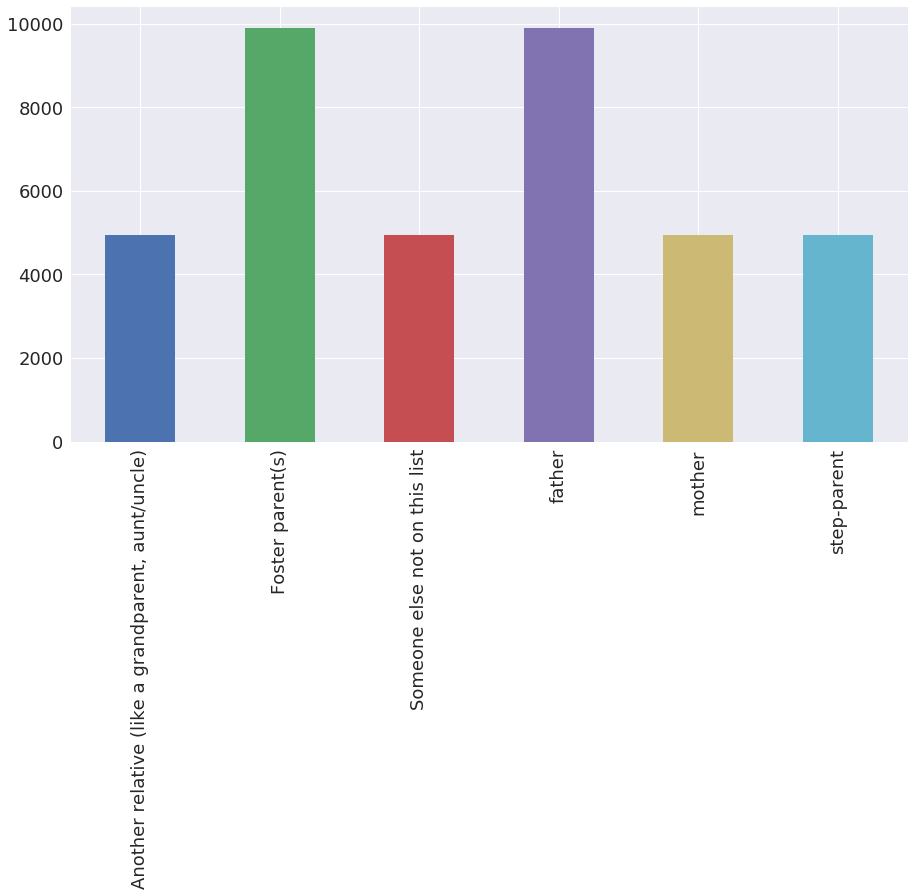

In [261]:
pd.Series(pl).plot(kind='bar', figsize=(15,8), fontsize= 18)

Creating a pie chart of the dictionary created that holds the frequncey of each single caregiver in the dataset using pandas package

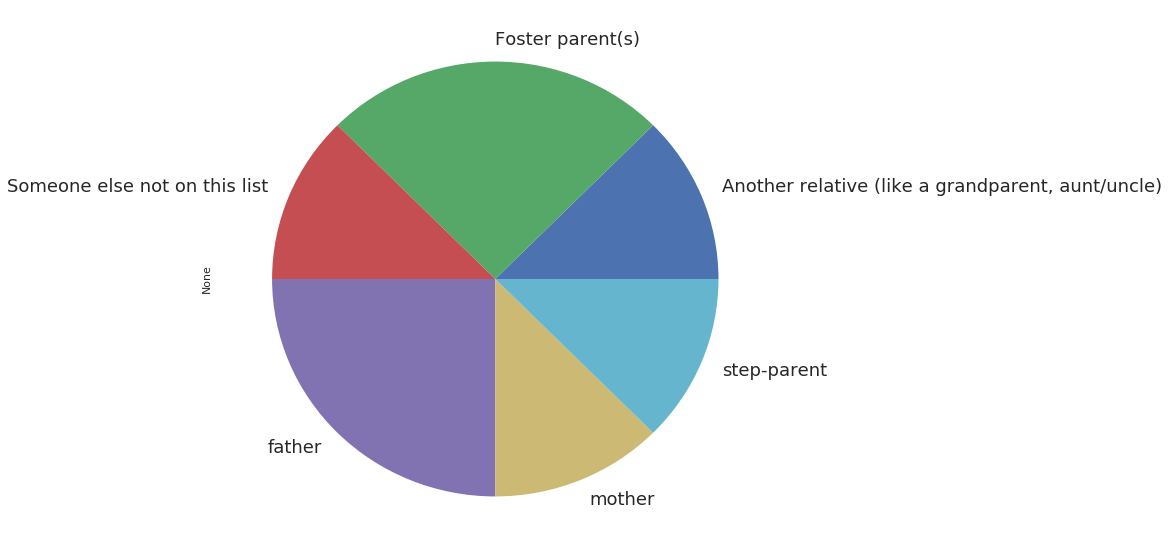

In [262]:
pd.Series(pl).plot(kind='pie', figsize=(10,10), fontsize= 18)

Creating a distplot using seaborn package of "mother" field to show its distribution

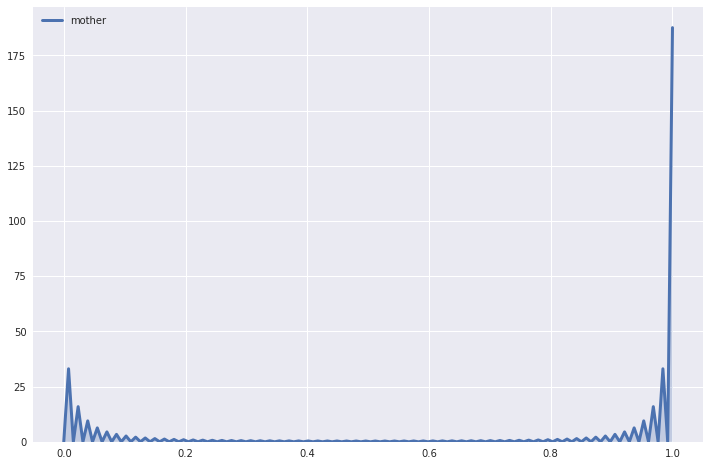

In [263]:
sns.distplot(column['mother'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'mother')
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(12,8)})

Creating a distplot using seaborn package of "father" field to show its distribution

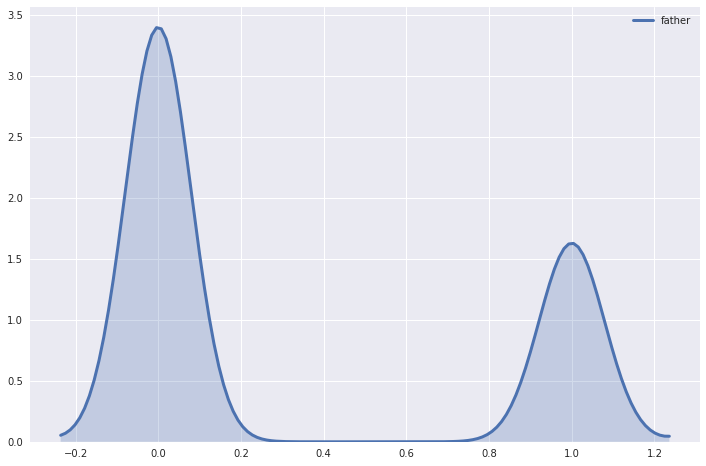

In [264]:
sns.distplot(column['father'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'father')
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(12,8)})

Creating a distplot using seaborn package of "step-parent" field to show its distribution

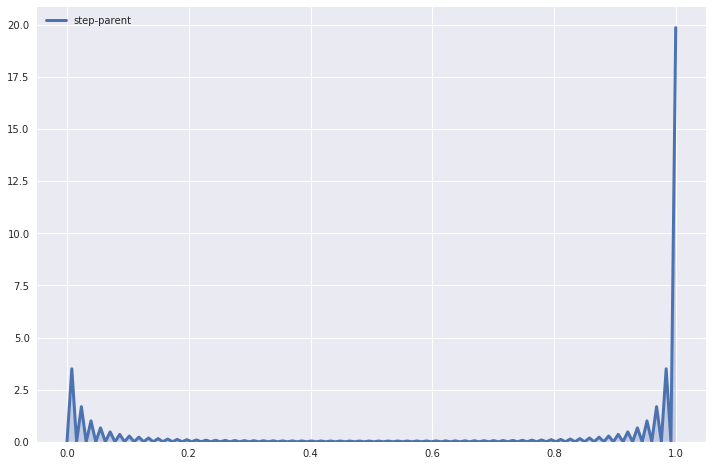

In [265]:
sns.distplot(column['step-parent'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'step-parent')
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(12,8)})

Creating a distplot of "Another relative (like a grandparent, aunt/uncle)" field to show its distribution

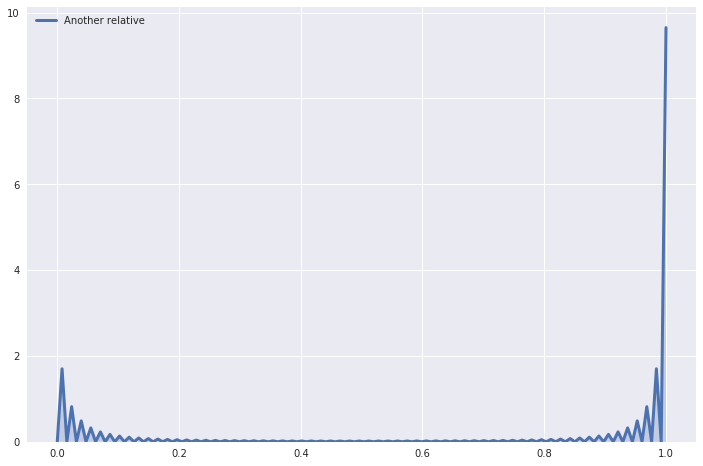

In [266]:
sns.distplot(column['Another relative (like a grandparent, aunt/uncle)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Another relative')
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(12,8)})

Creating a distplot using seaborn package of "Foster parent(s)" field to show its distribution

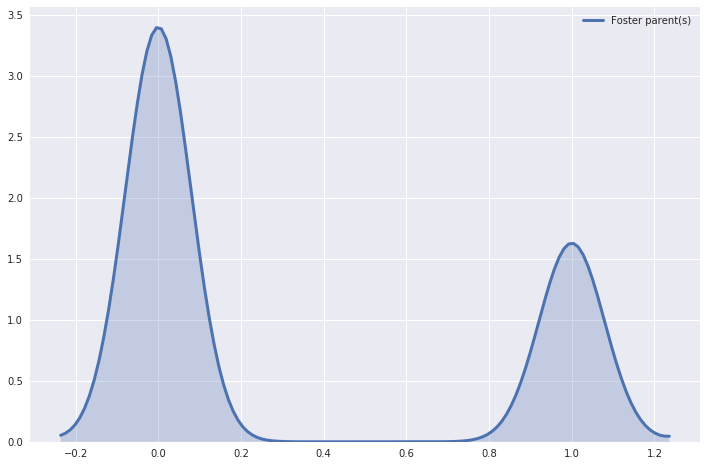

In [267]:
sns.distplot(column['Foster parent(s)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Foster parent(s)')
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(12,8)})

Creating a distplot using seaborn package of "Someone else not on this list" field to show its distribution

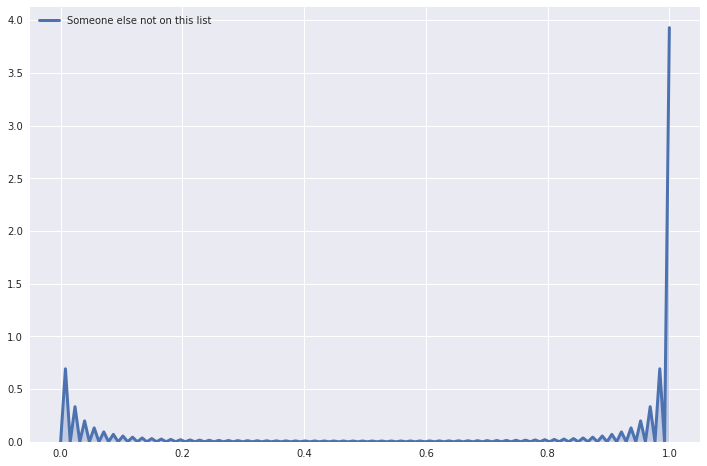

In [268]:
sns.distplot(column['Someone else not on this list'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Someone else not on this list')
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(12,8)})

Creating a distplot using seaborn package that shows all the single caregiver fields distribution together in the same plot

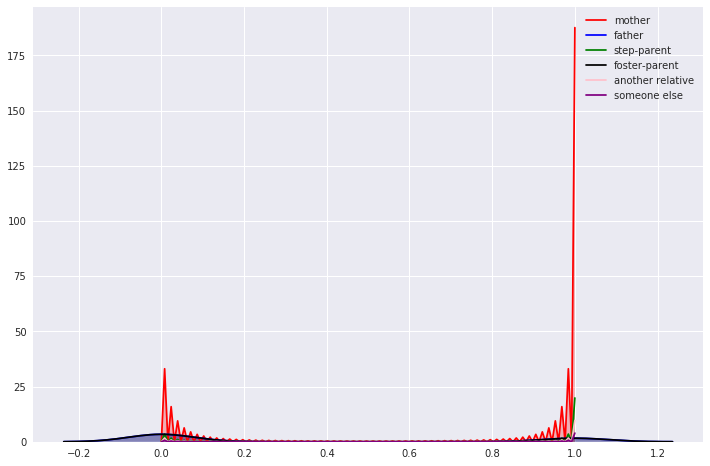

In [269]:
p1=sns.kdeplot(column['mother'], shade=True, color="red", label = 'mother')
p1=sns.kdeplot(column['father'], shade=True, color="blue", label = 'father')
p1=sns.kdeplot(column['step-parent'], shade=True, color="green", label = 'step-parent')
p1=sns.kdeplot(column['Foster parent(s)'], shade=True, color="black", label = 'foster-parent')
p1=sns.kdeplot(column['Another relative (like a grandparent, aunt/uncle)'], shade=True, color="pink", label ='another relative')
p1=sns.kdeplot(column['Someone else not on this list'], shade=True, color="purple", label = 'someone else')
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(20,10)})

Writing the newly created single caregiver fields using csv package to a new "output.csv" file in addition to the existing dataset

In [270]:
with open("output.csv", "w") as outfile:
   writer = csv.writer(outfile)
   writer.writerow(column.keys())
   writer.writerows(zip(*column.values()))